<a href="https://colab.research.google.com/github/resham-chana/hmlr/blob/main/hmlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def load_text_data(root_dir):
    texts = []
    labels = []

    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                if fname.endswith('.txt'):
                    file_path = os.path.join(class_path, fname)
                    with open(file_path, 'r', encoding='latin-1') as f:
                        texts.append(f.read())
                        labels.append(class_name)
    return texts, labels

# Set path
root_dir = '/content/drive/MyDrive/Colab Notebooks/bbc-fulltext/bbc/'
texts, labels = load_text_data(root_dir)

In [10]:

english_stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    alpha_only = [t for t in tokens if t.isalpha()]
    no_stops = [t for t in alpha_only if t not in english_stops]
    lemmatized = [lemmatizer.lemmatize(t) for t in no_stops]
    return lemmatized

def create_bows(processed_texts):
  bows = []
  for text in processed_texts:
    bow = Counter(text)
    bows.append(bow)
  return bows


In [20]:
print("Label:", labels[0])
print("Top 10 lemmatized tokens in first article:")
print(bows[0].most_common(10))

Label: sport
Top 10 lemmatized tokens in first article:
[('bomb', 5), ('real', 5), ('stadium', 4), ('madrid', 4), ('bernabeu', 3), ('said', 3), ('threat', 2), ('game', 2), ('sociedad', 2), ('people', 2)]


In [12]:
processed_docs = [preprocess_text(doc) for doc in texts]


In [24]:
bow_dataset = [{"label": label, "bow": bow} for label, bow in zip(labels, bows)]


In [22]:

# Function to plot top N tokens for a given label
def plot_top_terms_for_label(bow_dataset, label, top_n=10):
    # Combine all articles of this label
    category_bow = Counter()
    for doc in bow_dataset:
        if doc["label"] == label:
            category_bow.update(doc["bow"])

    # Get top N tokens
    most_common = category_bow.most_common(top_n)
    tokens, counts = zip(*most_common)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(tokens), palette="viridis")
    plt.title(f"Top {top_n} Tokens in Category: {label}")
    plt.xlabel("Frequency")
    plt.ylabel("Token")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-22-1937165557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="viridis")


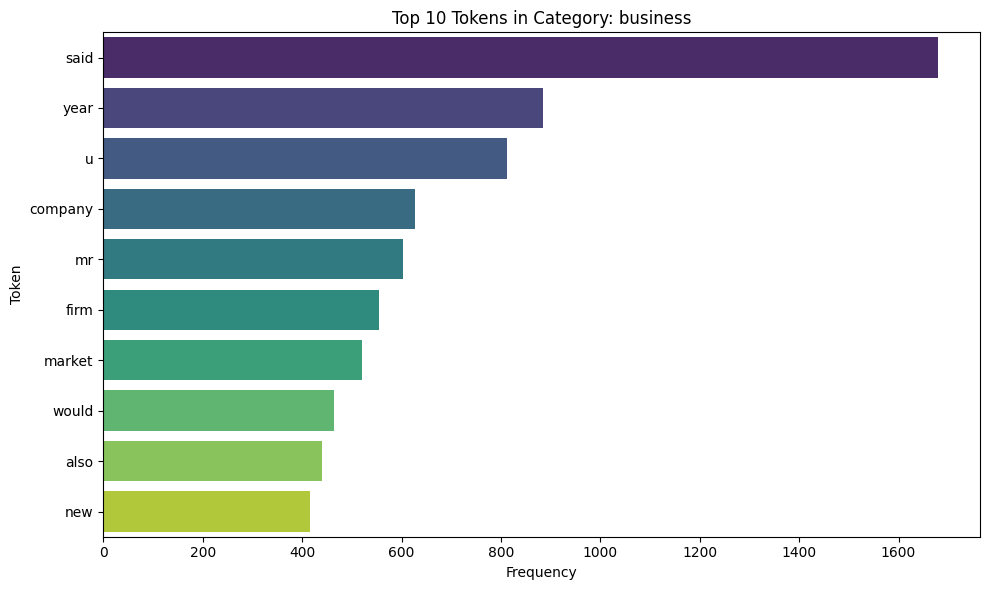

/tmp/ipython-input-22-1937165557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="viridis")


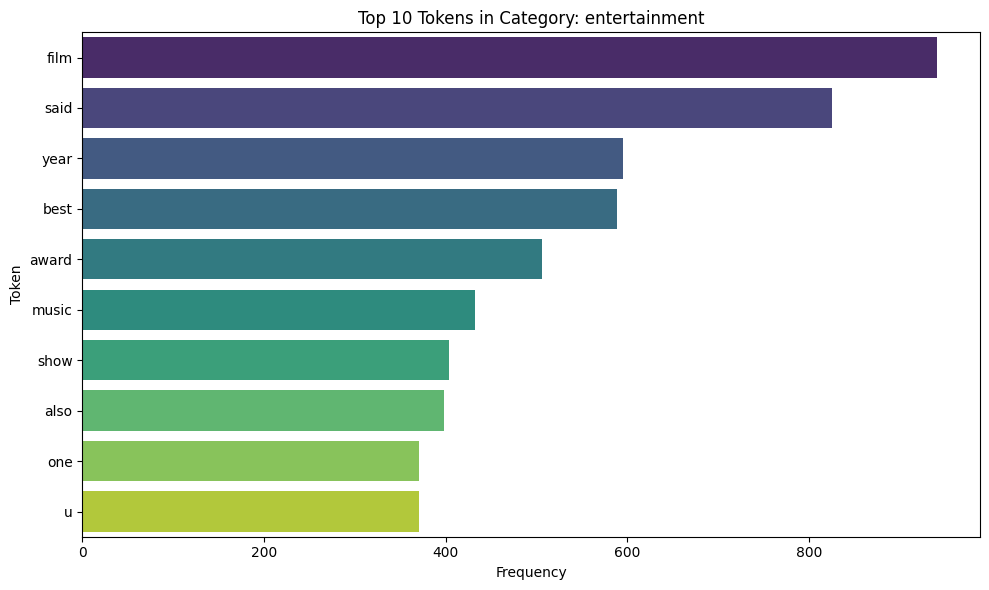

/tmp/ipython-input-22-1937165557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="viridis")


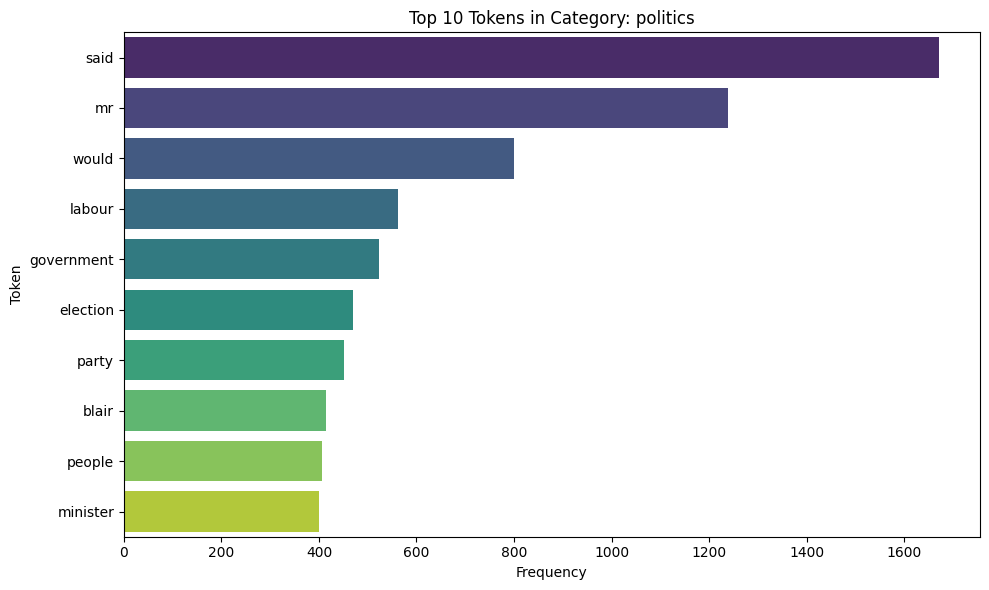

/tmp/ipython-input-22-1937165557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="viridis")


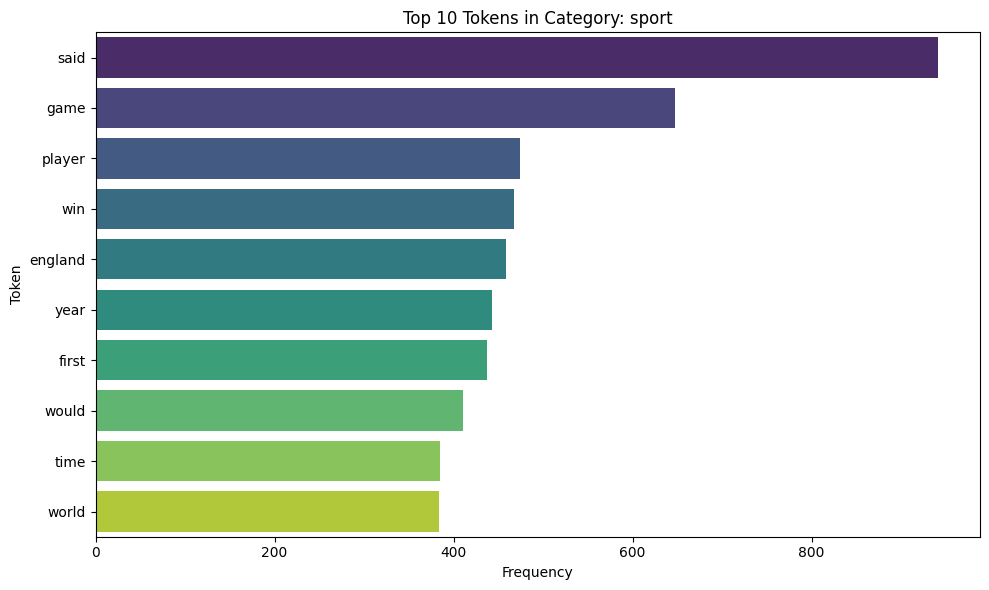

In [25]:
plot_top_terms_for_label(bow_dataset, label="business", top_n=10)
plot_top_terms_for_label(bow_dataset, label="entertainment", top_n=10)
plot_top_terms_for_label(bow_dataset, label="politics", top_n=10)
plot_top_terms_for_label(bow_dataset, label="sport", top_n=10)

In [13]:
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [14]:
from gensim.models import LdaModel

num_topics = 5
lda = LdaModel(corpus=corpus,
               id2word=dictionary,
               num_topics=num_topics,
               passes=10,
               random_state=42)

topics = lda.print_topics(num_words=10)
for i, topic in topics:
    print(f"\n🔹 Topic {i}:")
    print(topic)


🔹 Topic 0:
0.019*"said" + 0.010*"year" + 0.008*"u" + 0.006*"market" + 0.005*"sale" + 0.005*"new" + 0.005*"growth" + 0.005*"price" + 0.005*"bank" + 0.004*"also"

🔹 Topic 1:
0.007*"said" + 0.007*"game" + 0.007*"england" + 0.005*"wale" + 0.005*"first" + 0.005*"win" + 0.005*"player" + 0.005*"world" + 0.005*"ireland" + 0.004*"side"

🔹 Topic 2:
0.017*"film" + 0.011*"best" + 0.010*"award" + 0.009*"said" + 0.008*"year" + 0.006*"u" + 0.006*"also" + 0.005*"star" + 0.005*"actor" + 0.004*"director"

🔹 Topic 3:
0.018*"said" + 0.014*"mr" + 0.010*"would" + 0.007*"government" + 0.005*"labour" + 0.005*"year" + 0.005*"people" + 0.005*"election" + 0.004*"tax" + 0.004*"minister"

🔹 Topic 4:
0.017*"said" + 0.007*"mr" + 0.006*"would" + 0.005*"year" + 0.004*"time" + 0.004*"also" + 0.004*"one" + 0.004*"first" + 0.004*"two" + 0.004*"last"


In [15]:
doc_topics = [max(lda[doc], key=lambda x: x[1]) for doc in corpus]

# Combine with original labels
for i, (label, (topic_id, prob)) in enumerate(zip(labels, doc_topics)):
    print(f"Doc {i+1} | True Label: {label} | LDA Topic: {topic_id} | Confidence: {prob:.2f}")

Doc 1 | True Label: sport | LDA Topic: 4 | Confidence: 1.00
Doc 2 | True Label: sport | LDA Topic: 4 | Confidence: 1.00
Doc 3 | True Label: sport | LDA Topic: 3 | Confidence: 0.52
Doc 4 | True Label: sport | LDA Topic: 4 | Confidence: 0.95
Doc 5 | True Label: sport | LDA Topic: 1 | Confidence: 0.99
Doc 6 | True Label: sport | LDA Topic: 4 | Confidence: 0.99
Doc 7 | True Label: sport | LDA Topic: 3 | Confidence: 0.53
Doc 8 | True Label: sport | LDA Topic: 1 | Confidence: 0.56
Doc 9 | True Label: sport | LDA Topic: 1 | Confidence: 0.53
Doc 10 | True Label: sport | LDA Topic: 1 | Confidence: 0.52
Doc 11 | True Label: sport | LDA Topic: 2 | Confidence: 0.56
Doc 12 | True Label: sport | LDA Topic: 1 | Confidence: 0.51
Doc 13 | True Label: sport | LDA Topic: 1 | Confidence: 0.49
Doc 14 | True Label: sport | LDA Topic: 4 | Confidence: 0.99
Doc 15 | True Label: sport | LDA Topic: 1 | Confidence: 0.99
Doc 16 | True Label: sport | LDA Topic: 4 | Confidence: 0.66
Doc 17 | True Label: sport | LDA 

In [16]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.6 MB/s eta 0:00:00
